In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# In class assignment day 13 - Flux limiters

Today we'll implement a TVD upwind flux limiter scheme for the linear advection equation.

Feel free to continue using your own notebook or start with the skeleton below. "Your code here" does not imply that the code requires is a single line, or that the line starts with what is written there. It's just a direction what should go there.

More specifically, we will implement the Superbee (eqn 13.162) and Van Leer (eqn 13.162) limiter using the scheme detailed in (eqns 13.137 - 13.139).


In [ ]:
def initCond(profile):
        
    # test 1 - Toro 5.5.1
    if profile == 'smooth':
        x = np.linspace(-1,1,M,endpoint=False)
        alpha = 1.0
        beta = 8.0       
                
        u = alpha * np.exp(-beta*x**2.)
    
    # test 2 - discontinuous data
    elif profile == 'squarewave':
        x = np.linspace(-1,1,M,endpoint=False)
        u = 1.*np.ones_like(x)
        u[x <= 0.3] = 0.
        u[x >= 0.7] = 0.
    
    elif profile == 'burgers':
        x = np.linspace(0,1.5,M,endpoint=False)
        u = np.ones_like(x)
        u[x <= 0.5] = -0.5
        u[x >= 1.] = 0.
    
    return x,u

def solve(x,u0,method,tend):
        
    # setup perodic boundary conditions
    u = np.zeros((u0.shape[0] + 4),u0.dtype)
    
    u[2:-2] = u0

    time = 0
    dx = x[1] - x[0]
    
    while time < tend:
        # periodic boundary cond.
        u[0] = u[-4]
        u[1] = u[-3]
        u[-2] = u[2]
        u[-1] = u[3]
        
        dt = c * dx / np.abs(a)
        
        if time + dt > tend:
            dt = tend - time



        # doing DeltaU in one step (and using slices in the updates)
        # eqn (13.137)
        ##################################################
        # Delta_U <<< YOUR CODE HERE >>>
        ##################################################            

        # r is ratio of successive gradients (upwind/local)
        # (eq. 13.139)
        ##################################################
        # r = <<< YOUR CODE HERE >>>
        ##################################################
        
        psi = np.zeros_like(r)
        
        # Van Leer limiter (eqn 13.163)
        if method == 'VL':
            ##################################################
            # psi = <<< YOUR CODE HERE >>>
            ##################################################
            
        # Superbee limiter (eqn 13.162)
        elif method == 'superbee':
            ##################################################
            # psi = <<< YOUR CODE HERE >>>
            ##################################################
            
        else:
            print('method not implemented')
            return False

        #### (13.137) TVD general flux limiter update 
        # see what variables you might need based on the final update below 
        ##################################################
        #  <<< YOUR CODE HERE >>>
        ##################################################           

        u[2:-2] += -C * DeltaU[1:-2] + D * DeltaU[2:-1]

        time += dt

    return u[2:-2] 

def cmpSolversVsTimes(pattern,methods,tends):
    x, u0 = initCond(pattern)
    plt.plot(x,u0,label='init')    
    
    for tend in tends:
        for method in methods:
            u = solve(x,u0,method,tend)
            plt.plot(x,u,label= "%s t = %.2f" % (method,tend))

    plt.legend()
    


Now compare the different limiters with respect to different initial conditions and CFL value, e.g.,

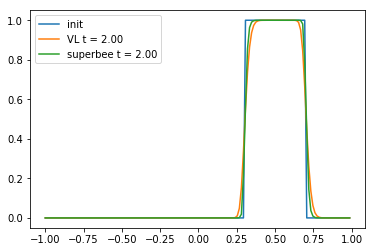

In [5]:
a = 1.
c = 0.8
M = 150

cmpSolversVsTimes('squarewave',[
    'VL',
    'superbee',

    ], [2.0])

If you have time, feel free to implement additional limiters.